In [2]:
import pandas as pd
import numpy as np
import matplotlib as mlt
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
import statsmodels.stats.power as smp
import scipy.stats
from scipy.stats import t, norm, ttest_ind, ttest_rel, ttest_1samp
import decimal
import random
from scipy.stats import mode
%matplotlib inline

In [3]:
decimal.getcontext().prec = 40
a = decimal.Decimal(np.random.exponential(1,1)[0])
b = decimal.Decimal(np.random.exponential(1,1)[0])
a/b

Decimal('2.732367367764493202838529338721785886730')

In [4]:
def conf_int_two_sample(x,y,alfa,alternative = 'two-tailed'):
    '''
    alternative == 'two-tailed','left','right'
    '''
    mean1 = np.mean(x)
    mean2 = np.mean(y)
    mean = mean1-mean2
    n1 = np.size(x)
    n2 = np.size(y)
    var1 = np.var(x,ddof=1)
    var2 = np.var(y,ddof=1)
    se = np.sqrt(var1/n1+var2/n2)
    ts = (np.mean(x)-np.mean(y))/se
    df = (var1/n1+var2/n2)**2/((var1/n1)**2/(n1-1)+(var2/n2)**2/(n2-1))
    #se = np.std(x,ddof=1)/np.sqrt(len(x))
    if alternative == 'two-tailed':
        return mean - t.ppf(1-alfa/2,df=df)*se,mean + t.ppf(1-alfa/2,df=df)*se
    elif alternative == 'left':
        return mean - t.ppf(1-alfa/2,df=df)*se
    elif alternative == 'right':
        return mean + t.ppf(1-alfa/2,df=df)*se

In [5]:
def get_normal_sample(n,mean,sd):
    return np.random.normal(loc=mean,scale=sd,size=n)

In [6]:
def t_test_for_independent_groups(x,y,diff = 0, alternative = 'two-tailed'): #Welch
    n1 = np.size(x)
    n2 = np.size(y)
    var1 = np.var(x,ddof=1)
    var2 = np.var(y,ddof=1)
    se = np.sqrt(var1/n1+var2/n2)
    ts = (np.mean(x)-np.mean(y)-diff)/se
    df = (var1/n1+var2/n2)**2/((var1/n1)**2/(n1-1)+(var2/n2)**2/(n2-1)) #Welch
    if alternative == 'two-tailed':
        p_val = 2*t.sf(np.abs(ts),df)
    if alternative == 'greater':
        p_val = t.sf(ts,df)
    if alternative == 'less':
        p_val = t.cdf(ts, df)
    return p_val

In [7]:
def independent_1(sample1,sample2,diff=0, eps = 0):
    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    mean = mean1-mean2
    
    if mean > diff+eps:
        return 'd'
    if  mean <= diff-eps:
        return 'm'
    if mean < delta+eps and mean > delta-eps  : #problematyczne eps > delta
        return 'nwd'


In [8]:
def independent_2(sample1, sample2, alfa, diff=0):
    result = t_test_for_independent_groups(sample1,sample2,diff = 0, alternative = 'greater')
    mean = np.mean(sample1) - np.mean(sample2)
    
    if result < alfa and mean > diff:
        return 'd'
    elif result > alfa and (mean <= diff):
        return 'm'
    else:
        return 'nwd'    

In [9]:
def independent_3(sample1, sample2, alfa, diff=0):
    result = t_test_for_independent_groups(sample1,sample2,diff = diff, alternative = 'greater')
    result2 = t_test_for_independent_groups(sample1,sample2,diff=diff,alternative='less')
    mean = np.mean(sample1) - np.mean(sample2)
    
    if result < alfa and mean > diff:
        return 'd'
    elif (result2 < alfa) and (mean <= diff):
        return 'm'
    #if result >= alfa:
    else:
        return 'nwd'

In [9]:
#zacznijmy od sprawdzenia podejścia numer 1:
    # - średnia populacyjna z rozkładu prostokątnego, w zakresach
    # - średnia populacyjna z rozkładu wykładniczego
    # - włożyć w to wielkość próby, sd - spoko byłoby wylosować może z chi kwadrat, eps
    # - można sprawdzić różne wielkości prób
    # - różne sd
# podejścia 2 i 3:
    # dwa pierwsze kroki takie same
    # - różne n, sd
    # upłynnić alfę
# potem się będzie myślało

In [9]:
# średnia populacyjna z rozkładu prostokątnego, w zakresach
delta = 4
n1 = 50
n2 = 50
sd1 = 4
sd2 = 4
eps = 0.01
alfa = 0.05
results_podejście1 = []
results_podejście2 = []
results_podejście3 = []
#lst = np.random.exponential(3,size=400)
#for i in lst:
for i in range(0,601):
    mean =  i*0.01
    sample1 = get_normal_sample(n1,mean,sd1)
    sample2 = get_normal_sample(n2,0,sd2)
    res = independent_1(sample1,sample2,diff=delta,eps=eps) 
    results_podejście1.append([res,mean+delta])
    res2  = independent_2(sample1,sample2,alfa,delta)
    res3  = independent_3(sample1,sample2,alfa,delta)
    results_podejście2.append([res2,mean])
    results_podejście3.append([res3,mean])
    
poprawne_duże_podejście1 = [i for i in results_podejście1 if i[0] == 'd' and i[1] > delta]
poprawne_małe_podejście1 = [i for i in results_podejście1 if i[0] == 'm' and i[1] < delta]
niepoprawne_duże_podejście1 = [i for i in results_podejście1 if i[0] == 'd' and i[1] < delta]
niepoprawne_małe_podejście1 = [i for i in results_podejście1 if i[0] == 'm' and i[1] > delta]
niewiadomo_podejście1 = [i for i in results_podejście1 if i[0] == 'nwd']

poprawne_duże_podejście2 = [i for i in results_podejście2 if i[0] == 'd' and i[1] > delta]
poprawne_małe_podejście2 = [i for i in results_podejście2 if i[0] == 'm' and i[1] < delta]
niepoprawne_duże_podejście2 = [i for i in results_podejście2 if i[0] == 'd' and i[1] < delta]
niepoprawne_małe_podejście2 = [i for i in results_podejście2 if i[0] == 'm' and i[1] > delta]
niewiadomo_podejście2 = [i for i in results_podejście2 if i[0] == 'nwd']

poprawne_duże_podejście3 = [i for i in results_podejście3 if i[0] == 'd' and i[1] > delta]
poprawne_małe_podejście3 = [i for i in results_podejście3 if i[0] == 'm' and i[1] < delta]
niepoprawne_duże_podejście3 = [i for i in results_podejście3 if i[0] == 'd' and i[1] < delta]
niepoprawne_małe_podejście3 = [i for i in results_podejście3 if i[0] == 'm' and i[1] > delta]
niewiadomo_podejście3 = [i for i in results_podejście3 if i[0] == 'nwd']



print(len(poprawne_duże_podejście2))
print(len(poprawne_małe_podejście2))
print(len(niepoprawne_duże_podejście2))
print(len(niepoprawne_małe_podejście2))
#print(np.mean([i[1] for i in niepoprawne_małe_podejście2]))
print(len(niewiadomo_podejście2))
print('\n')
print(len(poprawne_duże_podejście3))
print(len(poprawne_małe_podejście3))
print(len(niepoprawne_duże_podejście3))
print(len(niepoprawne_małe_podejście3))
print(len(niewiadomo_podejście3))
print('\n')
print(len(poprawne_duże_podejście1))
print(len(poprawne_małe_podejście1))
print(len(niepoprawne_duże_podejście1))
print(len(niepoprawne_małe_podejście1))
print(len(niewiadomo_podejście1))
#print(np.mean([i[1] for i in niepoprawne_małe_podejście1]))
#print(niepoprawne_małe_podejście1)

166
133
36
0
266


81
269
3
0
248


201
0
0
395
4


(array([1., 0., 0., 0., 0., 0., 1., 1., 0., 1.]),
 array([7.32 , 7.414, 7.508, 7.602, 7.696, 7.79 , 7.884, 7.978, 8.072,
        8.166, 8.26 ]),
 <a list of 10 Patch objects>)

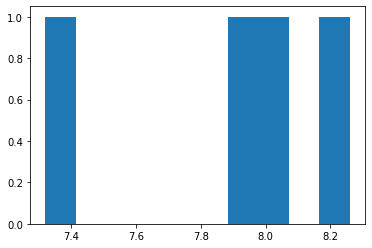

In [10]:
fig, (ax1) = plt.subplots(1,sharex=True)
z = [i for i in range(len(niewiadomo_podejście1))]
ax1.hist([i[1] for i in niewiadomo_podejście1],bins=10)

Wall time: 33.4 s


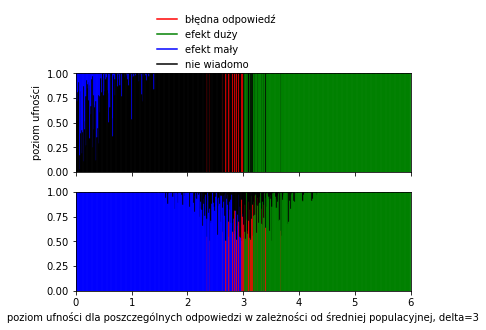

In [11]:
def rysuj():
    fig, (ax1,ax2) = plt.subplots(2,sharex=True)
    n1 = 50
    n2 = 50
    sd1 = 2
    sd2 = 2
    delta = 3
    mean1 = 0
    #res2 = []
    #res3 = []
    ax1.set_xlim(0,6)
    diffs = [i*0.01 for i in range(0,601)]
    for diff in diffs:
        sample1 = get_normal_sample(n1,mean1+diff,sd1)
        sample2 = get_normal_sample(n2,mean1,sd2)
        res2=[independent_2(sample1,sample2,i*0.01,delta) for i in range(1,101)]
        res3=[independent_3(sample1,sample2,i*0.01,delta) for i in range(1,101)]
        result = diff - delta
        res2_vals = {'m':[1-(i+1)*0.01 for i,x in enumerate(res2) if x == 'm'],'d':[1-(i+1)*0.01 for i,x in enumerate(res2) if x == 'd'],'nwd':[1-(i+1)*0.01 for i,x in enumerate(res2) if x == 'nwd']}
        res3_vals = {'m':[1-(i+1)*0.01 for i,x in enumerate(res3) if x == 'm'],'d':[1-(i+1)*0.01 for i,x in enumerate(res3) if x == 'd'],'nwd':[1-(i+1)*0.01 for i,x in enumerate(res3) if x == 'nwd']}
        
        
        if result > 0:

            if len(res2_vals['m']) != 0:
                ax1.axvline(diff,ymin=res2_vals['m'][-1],ymax=res2_vals['m'][0], color = 'red')
            if len(res2_vals['d']) != 0:
                ax1.axvline(diff,ymin=res2_vals['d'][-1],ymax=res2_vals['d'][0], color = 'green')#,label = 'efekt duży')
            if len(res2_vals['nwd']) != 0:
                ax1.axvline(diff,ymin=res2_vals['nwd'][-1],ymax=res2_vals['nwd'][0], color = 'black')#,label = 'nie wiadomo')            
            if len(res3_vals['m']) != 0:
                ax2.axvline(diff,ymin=res3_vals['m'][-1],ymax=res3_vals['m'][0], color = 'red')
            if len(res3_vals['d']) != 0:
                ax2.axvline(diff,ymin=res3_vals['d'][-1],ymax=res3_vals['d'][0], color = 'green')#,label = 'efekt duży')
            if len(res3_vals['nwd']) != 0:
                ax2.axvline(diff,ymin=res3_vals['nwd'][-1],ymax=res3_vals['nwd'][0], color = 'black')#,label = 'nie wiadomo')

        else:

            if len(res2_vals['m']) != 0:
                ax1.axvline(diff,ymin=res2_vals['m'][-1],ymax=res2_vals['m'][0], color = 'blue')#,label = 'efekt mały')
            if len(res2_vals['d']) != 0:
                ax1.axvline(diff,ymin=res2_vals['d'][-1],ymax=res2_vals['d'][0], color = 'red')
            if len(res2_vals['nwd']) != 0:
                ax1.axvline(diff,ymin=res2_vals['nwd'][-1],ymax=res2_vals['nwd'][0], color = 'black')#,label = 'nie wiadomo')            
            if len(res3_vals['m']) != 0:
                ax2.axvline(diff,ymin=res3_vals['m'][-1],ymax=res3_vals['m'][0], color = 'blue')#,label = 'efekt mały')
            if len(res3_vals['d']) != 0:
                ax2.axvline(diff,ymin=res3_vals['d'][-1],ymax=res3_vals['d'][0], color = 'red')
            if len(res3_vals['nwd']) != 0:
                ax2.axvline(diff,ymin=res3_vals['nwd'][-1],ymax=res3_vals['nwd'][0], color = 'black')#,label = 'nie wiadomo')
    
    ax1.axvline(0,ymin=0,ymax=0,color='red',label = 'błędna odpowiedź')
    ax1.axvline(0,ymin=0,ymax=0,color='green',label = 'efekt duży')
    ax1.axvline(0,ymin=0,ymax=0,color='blue',label = 'efekt mały')
    ax1.axvline(0,ymin=0,ymax=0,color='black',label = 'nie wiadomo')
    ax1.set_ylabel('poziom ufności')
    ax2.set_xlabel('poziom ufności dla poszczególnych odpowiedzi w zależności od średniej populacyjnej, delta=3')
    mlt.rcParams.update(mlt.rcParamsDefault)

    fig.legend(frameon=False, loc = 'center', bbox_to_anchor = (0.5,1))
        
        
%time rysuj()

In [12]:
duże1 = []
małe1 = []
duże2 = []
duże3 = []
małe2 = []
małe3 = []
źle_duże1 = []
niewiadomo_duże1 = []
źle_duże2 = []
niewiadomo_duże2 = []
źle_duże3 = []
niewiadomo_duże3 = []
źle_małe1 = []
niewiadomo_małe1 = []
źle_małe2 = []
niewiadomo_małe2 = []
źle_małe3 = []
niewiadomo_małe3 = []
przedziały_n = []
ile_dużych = []
ile_małych = []
means = []
delta = 4
mean = 0
eps = 1
sds = [i*0.1 for i in range(20,50)]
for k in range(1,25): 
    p1,p2 = 15+k*5,20+k*5
    for sd in sds:
        przedziały_n.append(p1)
        pod1 = []
        pod2 = []
        pod3 = []
        for n in range(p1,p2):
            for j in range(0,60):
                pop_mean = j*0.1
                alfa = 0.05
                sample1 = get_normal_sample(n,mean+pop_mean,sd)
                sample2 = get_normal_sample(n,mean,sd)
                pod1.append([independent_1(sample1,sample2,delta,eps),pop_mean,eps])
                pod2.append([independent_2(sample1,sample2,alfa,delta),pop_mean,alfa])
                pod3.append([independent_3(sample1,sample2,alfa,delta),pop_mean,alfa])
    
        # --------------------------------------------------      wśród wyników które były duże, ile z nich wskazał test - (wyniki wskazane przez test)/(faktycznie duże testy
        #---------------------------------------------------      ile razy test wskazał wynik mały, gdy ten w rzeczywistości był duży
        #---------------------------------------------------      ile razy test wskazał "nie wiadomo", gdy efekt w rzeczywistości był duży
        #podejście 1
        duże_pod1 = [i for i in pod1 if np.abs(i[1]) > np.abs(delta)]

        if len(duże_pod1) != 0:
            pod1_dobrze_duże = len([i for i in duże_pod1 if i[0] == 'd'])/len(duże_pod1)
            pod1_źle_duże = len([i for i in duże_pod1 if i[0] == 'm'])/len(duże_pod1)
            pod1_niewiadomo_duże = len([i for i in duże_pod1 if i[0] == 'nwd'])/len(duże_pod1)
        else:
            pod1_dobrze_duże = 'brak'
            pod1_źle_duże = 'brak'
            pod1_niewiadomo_duże = 'brak'
        #podejście 2
        duże_pod2 = [i for i in pod2 if np.abs(i[1]) > np.abs(delta)]
        if len(duże_pod2) != 0:
            pod2_dobrze_duże = len([i for i in duże_pod2 if i[0] == 'd'])/len(duże_pod2)
            pod2_źle_duże = len([i for i in duże_pod2 if i[0] == 'm'])/len(duże_pod2)
            pod2_niewiadomo_duże = len([i for i in duże_pod2 if i[0] == 'nwd'])/len(duże_pod2)
        else:
            pod2_dobrze_duże = 'brak'
            pod2_źle_duże = 'brak'
            pod2_niewiadomo_duże = 'brak'
        #podejście 3
        duże_pod3 = [i for i in pod3 if np.abs(i[1]) > np.abs(delta)]
        if len(duże_pod3) != 0:
            pod3_dobrze_duże = len([i for i in duże_pod3 if i[0] == 'd'])/len(duże_pod3)
            pod3_źle_duże = len([i for i in duże_pod3 if i[0] == 'm'])/len(duże_pod3)
            pod3_niewiadomo_duże = len([i for i in duże_pod3 if i[0] == 'nwd'])/len(duże_pod3)
        else:
            pod3_dobrze_duże = 'brak'
            pod3_źle_duże = 'brak'
            pod3_niewiadomo_duże = 'brak'

        # --------------------------------------------------      wśród wyników które były małe, ile z nich wskazał test - (wyniki małe wskazane przez test)/(faktycznie małe wyniki)
        #---------------------------------------------------      ile razy test wskazał wynik duży, gdy ten w rzeczywistości był mały
        #---------------------------------------------------      ile razy test wskazał "nie wiadomo", gdy efekt w rzeczywistości był duży
        #podejście 1
        małe_pod1 = [i for i in pod1 if (np.abs(i[1]) < np.abs(delta))]
        if len(małe_pod1) != 0:
            pod1_dobrze_małe = len([i for i in małe_pod1 if i[0] == 'm'])/len(małe_pod1)
            pod1_źle_małe = len([i for i in małe_pod1 if i[0] == 'd'])/len(małe_pod1)
            pod1_niewiadomo_małe = len([i for i in małe_pod1 if i[0] == 'nwd'])/len(małe_pod1)
        else:
            pod1_dobrze_małe = 'brak'
            pod1_źle_małe = 'brak'
            pod1_niewiadomo_małe = 'brak'

        #podejście 2
        małe_pod2 = [i for i in pod2 if np.abs(i[1]) < np.abs(delta)]
        if len(małe_pod2) != 0:
            pod2_dobrze_małe = len([i for i in małe_pod2 if i[0] == 'm'])/len(małe_pod2)
            pod2_źle_małe = len([i for i in małe_pod2 if i[0] == 'd'])/len(małe_pod2)
            pod2_niewiadomo_małe = len([i for i in małe_pod2 if i[0] == 'nwd'])/len(małe_pod2)
        else:
            pod2_dobrze_małe = 'brak'
            pod2_źle_małe = 'brak'
            pod2_niewiadomo_małe = 'brak'

        #podejście 3
        małe_pod3 = [i for i in pod3 if np.abs(i[1]) < np.abs(delta)]
        if len(małe_pod3) != 0:
            pod3_dobrze_małe = len([i for i in małe_pod3 if i[0] == 'm'])/len(małe_pod3)
            pod3_źle_małe = len([i for i in małe_pod3 if i[0] == 'd'])/len(małe_pod3)
            pod3_niewiadomo_małe = len([i for i in małe_pod3 if i[0] == 'nwd'])/len(małe_pod3)
        else:
            pod3_dobrze_małe = 'brak'
            pod3_źle_małe = 'brak'
            pod3_niewiadomo_małe = 'brak'


        duże1.append(pod1_dobrze_duże)
        małe1.append(pod1_dobrze_małe)
        duże2.append(pod2_dobrze_duże)
        duże3.append(pod3_dobrze_duże)
        małe2.append(pod2_dobrze_małe)
        małe3.append(pod3_dobrze_małe)

        źle_duże1.append(pod1_źle_duże)
        źle_duże2.append(pod2_źle_duże)
        źle_duże3.append(pod3_źle_duże)
        niewiadomo_duże1.append(pod1_niewiadomo_duże)
        niewiadomo_duże2.append(pod2_niewiadomo_duże)
        niewiadomo_duże3.append(pod3_niewiadomo_duże)

        źle_małe1.append(pod1_źle_małe)
        źle_małe2.append(pod2_źle_małe)
        źle_małe3.append(pod3_źle_małe)
        niewiadomo_małe1.append(pod1_niewiadomo_małe)
        niewiadomo_małe2.append(pod2_niewiadomo_małe)
        niewiadomo_małe3.append(pod3_niewiadomo_małe)


In [13]:
sdss = sds*25

In [14]:
trzy_podejścia = pd.DataFrame(zip(przedziały_n,sdss,duże1,duże2,duże3,małe1,małe2,małe3,źle_duże1,źle_duże2,źle_duże3,niewiadomo_duże1,niewiadomo_duże2,niewiadomo_duże3,źle_małe1,źle_małe2,źle_małe3,niewiadomo_małe1,
                                  niewiadomo_małe2,niewiadomo_małe3), columns = ['wielkość próby','sd','efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3','mały_podejście1','mały_podejście2','mały_podejście3',
                                                                                 'źle_duże1','źle_duże2','źle_duże3','nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3','źle_małe1','źle_małe2','źle_małe3',
                                                                                 'niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3'])
trzy_podejścia

,wielkość próby,sd,"efekt duży, podejście1","efekt duży, podejście2","efekt duży, podejście3",mały_podejście1,mały_podejście2,mały_podejście3,źle_duże1,źle_duże2,źle_duże3,nie wiadomo duże1,nie wiadomo duże2,nie wiadomo duże3,źle_małe1,źle_małe2,źle_małe3,niewiadomo_małe1,niewiadomo_małe2,niewiadomo_małe3
0,20,2.0,0.505263,0.905263,0.505263,0.740,0.285,0.720,0.000000,0.0,0.000000,0.494737,0.094737,0.494737,0.000,0.075,0.000,0.260,0.640,0.280
1,20,2.1,0.505263,0.894737,0.494737,0.750,0.300,0.735,0.000000,0.0,0.000000,0.494737,0.105263,0.505263,0.010,0.085,0.000,0.240,0.615,0.265
2,20,2.2,0.526316,0.884211,0.494737,0.775,0.280,0.755,0.000000,0.0,0.000000,0.473684,0.115789,0.505263,0.005,0.040,0.005,0.220,0.680,0.240
3,20,2.3,0.484211,0.873684,0.431579,0.745,0.300,0.705,0.021053,0.0,0.021053,0.494737,0.126316,0.547368,0.005,0.065,0.000,0.250,0.635,0.295
4,20,2.4,0.442105,0.831579,0.326316,0.735,0.295,0.675,0.000000,0.0,0.000000,0.557895,0.168421,0.673684,0.010,0.055,0.005,0.255,0.650,0.320
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,135,4.5,0.494737,0.905263,0.578947,0.750,0.225,0.770,0.000000,0.0,0.000000,0.505263,0.094737,0.421053,0.005,0.050,0.010,0.245,0.725,0.220
716,135,4.6,0.557895,0.926316,0.589474,0.730,0.225,0.750,0.000000,0.0,0.010526,0.442105,0.073684,0.400000,0.000,0.045,0.000,0.270,0.730,0.250
717,135,4.7,0.505263,0.884211,0.536842,0.760,0.250,0.775,0.000000,0.0,0.000000,0.494737,0.115789,0.463158,0.000,0.045,0.005,0.240,0.705,0.220
718,135,4.8,0.494737,0.905263,0.526316,0.730,0.255,0.750,0.000000,0.0,0.000000,0.505263,0.094737,0.473684,0.000,0.055,0.000,0.270,0.690,0.250


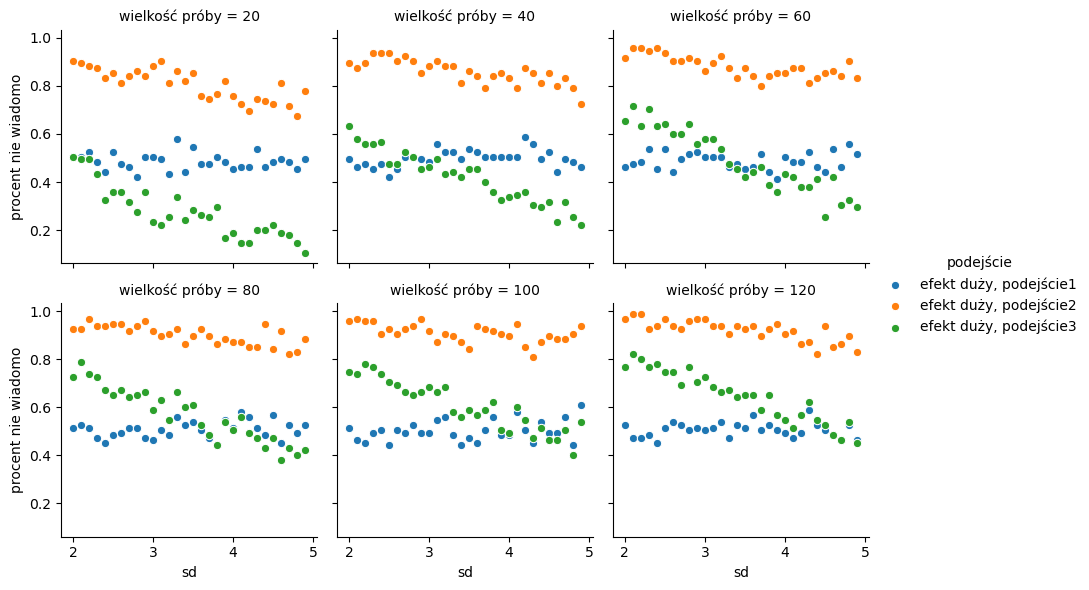

In [15]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży = ['efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3']

dt = trzy_podejścia[['wielkość próby','sd','efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3'],value_name='procent nie wiadomo',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent nie wiadomo')
g.add_legend()
#g.set(xlabel = 'asd')

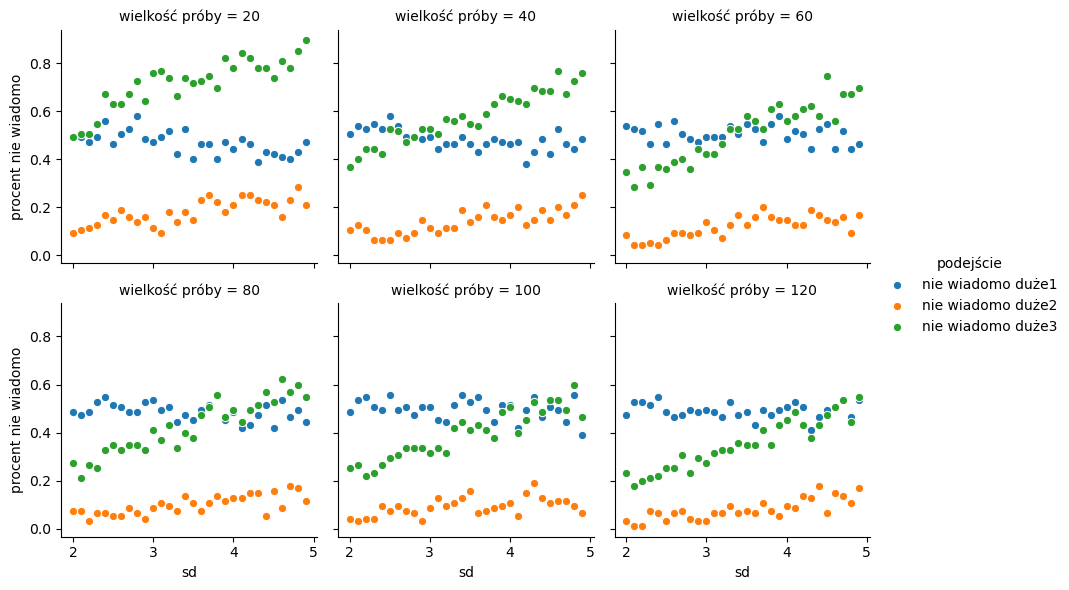

In [16]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_niewiadomo = ['nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3']
duży_źle = ['źle_duże1','źle_duże2','źle_duże3']
mały_dobrze = ['mały_podejście1','mały_podejście2','mały_podejście3']

dt = trzy_podejścia[['wielkość próby','sd','nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3'],value_name='procent nie wiadomo',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent nie wiadomo')
g.add_legend()
#g.set(xlabel = 'asd')

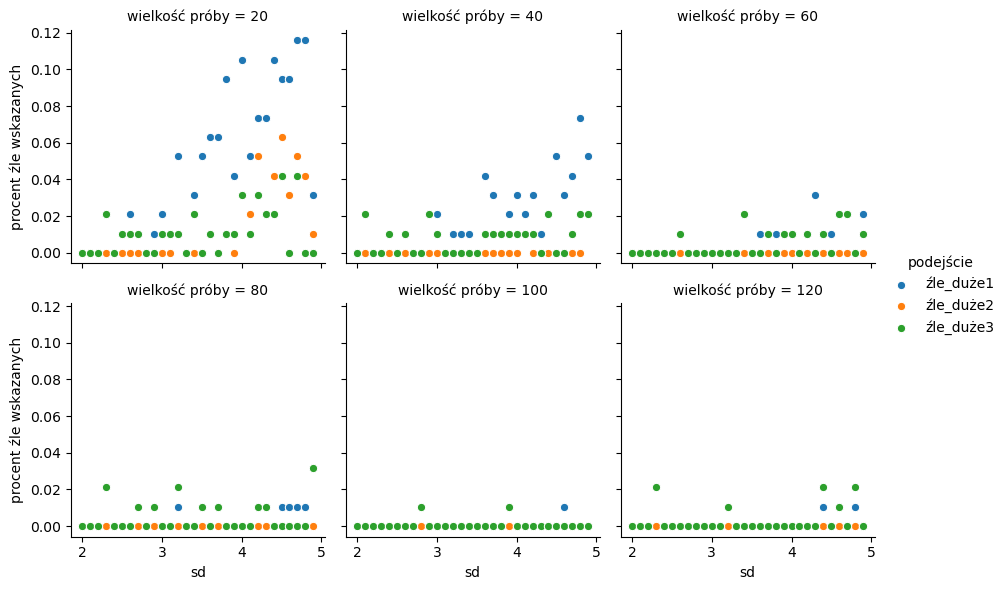

In [17]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_źle = ['źle_duże1','źle_duże2','źle_duże3']
mały_dobrze = ['mały_podejście1','mały_podejście2','mały_podejście3']

dt = trzy_podejścia[['wielkość próby','sd','źle_duże1','źle_duże2','źle_duże3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['źle_duże1','źle_duże2','źle_duże3'],value_name='procent źle wskazanych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent źle wskazanych')
g.add_legend()
#g.set(xlabel = 'asd')

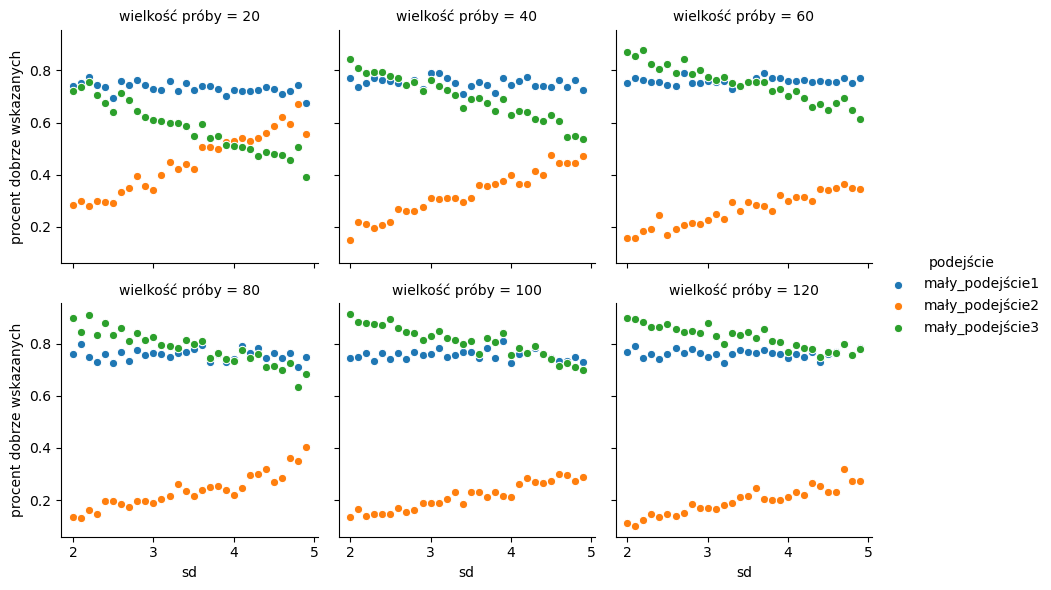

In [18]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
mały_dobrze = ['mały_podejście1','mały_podejście2','mały_podejście3']

dt = trzy_podejścia[['wielkość próby','sd','mały_podejście1','mały_podejście2','mały_podejście3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['mały_podejście1','mały_podejście2','mały_podejście3'],value_name='procent dobrze wskazanych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent dobrze wskazanych')
g.add_legend()
#g.set(xlabel = 'asd')

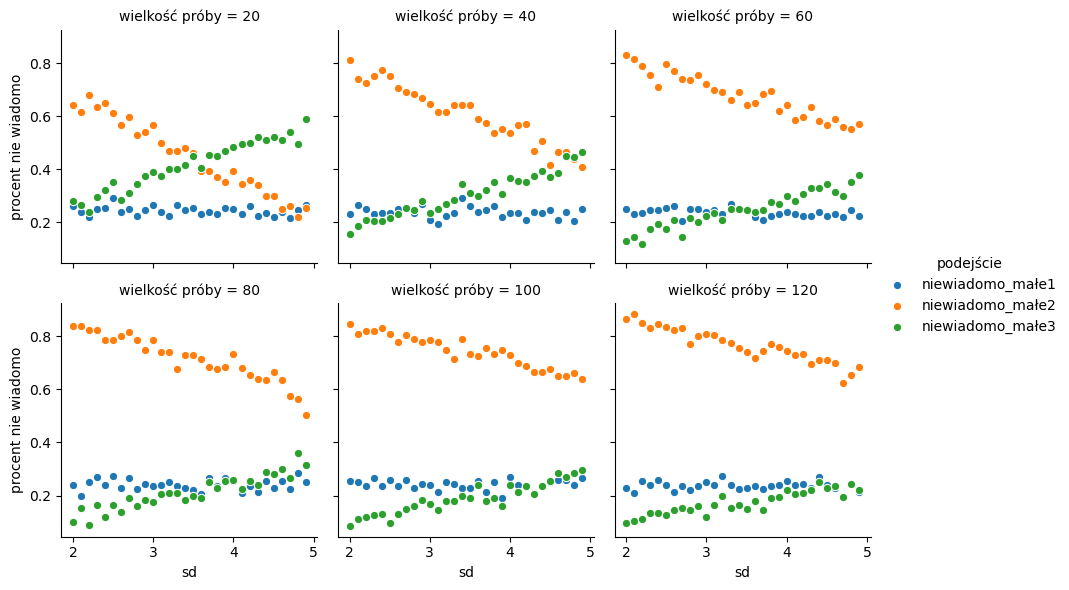

In [19]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
mały_niewiadomo = ['niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3']

dt = trzy_podejścia[['wielkość próby','sd','niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3'],value_name='procent nie wiadomo',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent nie wiadomo')
g.add_legend()
#g.set(xlabel = 'asd')

In [25]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
źle_małe = ['źle_małe1','źle_małe2','źle_małe3']

dt = trzy_podejścia[['wielkość próby','sd','źle_małe1','źle_małe2','źle_małe3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['źle_małe1','źle_małe2','źle_małe3'],value_name='procent źle wskazanych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent źle wskazanych')
g.add_legend()
#g.set(xlabel = 'asd')

In [10]:
eps = 0.5
duże1 = []
małe1 = []
duże2 = []
duże3 = []
małe2 = []
małe3 = []
źle_duże1 = []
niewiadomo_duże1 = []
źle_duże2 = []
niewiadomo_duże2 = []
źle_duże3 = []
niewiadomo_duże3 = []
źle_małe1 = []
niewiadomo_małe1 = []
źle_małe2 = []
niewiadomo_małe2 = []
źle_małe3 = []
niewiadomo_małe3 = []
przedziały_n = []
ile_dużych = []
ile_małych = []
means = []
delta = 3
mean = 0
sds = [i*0.1 for i in range(20,50)]
#n1 = 45
#n2 = 30
#sd1 = 2
#sd2 = 2
n1 = 60
for n2 in range(61,121):   
    for sd in sds:
        przedziały_n.append(n2-n1)
        pod1 = []
        pod2 = []
        pod3 = []
        for j in range(0,61):
            pop_mean = j*0.1
            alfa = 0.05
            sample1 = get_normal_sample(n1,mean+pop_mean,sd)
            sample2 = get_normal_sample(n2,mean,sd)
            #p1 = mode([independent_1(sample1,sample2,delta,eps) for i in range(10)])[0][0]
            #p2 = mode([independent_2(sample1,sample2,alfa,delta) for i in range(10)])[0][0]
            #p3 = mode([independent_3(sample1,sample2,alfa,delta) for i in range(10)])[0][0]
            pod1.append([independent_1(sample1,sample2,delta,eps),pop_mean,eps])
            pod2.append([independent_2(sample1,sample2,alfa,delta),pop_mean,alfa])
            pod3.append([independent_3(sample1,sample2,alfa,delta),pop_mean,alfa])
            #pod1.append([p1,pop_mean,eps])
            #pod2.append([p2,pop_mean,alfa])
            #pod3.append([p3,pop_mean,alfa])
    
    # ---------------------------------------------------      wśród wyników które były duże, ile z nich wskazał test - (wyniki wskazane przez test)/(faktycznie duże testy
    # ---------------------------------------------------      ile razy test wskazał wynik mały, gdy ten w rzeczywistości był duży
    # ---------------------------------------------------      ile razy test wskazał "nie wiadomo", gdy efekt w rzeczywistości był duży
    # podejście 1
        duże_pod1 = [i for i in pod1 if np.abs(i[1]) > np.abs(delta)]

        if len(duże_pod1) != 0:
            pod1_dobrze_duże = len([i for i in duże_pod1 if i[0] == 'd'])/len(duże_pod1)
            pod1_źle_duże = len([i for i in duże_pod1 if i[0] == 'm'])/len(duże_pod1)
            pod1_niewiadomo_duże = len([i for i in duże_pod1 if i[0] == 'nwd'])/len(duże_pod1)
        else:
            pod1_dobrze_duże = 'brak'
            pod1_źle_duże = 'brak'
            pod1_niewiadomo_duże = 'brak'
        #podejście 2
        duże_pod2 = [i for i in pod2 if np.abs(i[1]) > np.abs(delta)]
        if len(duże_pod2) != 0:
            pod2_dobrze_duże = len([i for i in duże_pod2 if i[0] == 'd'])/len(duże_pod2)
            pod2_źle_duże = len([i for i in duże_pod2 if i[0] == 'm'])/len(duże_pod2)
            pod2_niewiadomo_duże = len([i for i in duże_pod2 if i[0] == 'nwd'])/len(duże_pod2)
        else:
            pod2_dobrze_duże = 'brak'
            pod2_źle_duże = 'brak'
            pod2_niewiadomo_duże = 'brak'
        #podejście 3
        duże_pod3 = [i for i in pod3 if np.abs(i[1]) > np.abs(delta)]
        if len(duże_pod3) != 0:
            pod3_dobrze_duże = len([i for i in duże_pod3 if i[0] == 'd'])/len(duże_pod3)
            pod3_źle_duże = len([i for i in duże_pod3 if i[0] == 'm'])/len(duże_pod3)
            pod3_niewiadomo_duże = len([i for i in duże_pod3 if i[0] == 'nwd'])/len(duże_pod3)
        else:
            pod3_dobrze_duże = 'brak'
            pod3_źle_duże = 'brak'
            pod3_niewiadomo_duże = 'brak'

        # --------------------------------------------------      wśród wyników które były małe, ile z nich wskazał test - (wyniki małe wskazane przez test)/(faktycznie małe wyniki)
        #---------------------------------------------------      ile razy test wskazał wynik duży, gdy ten w rzeczywistości był mały
        #---------------------------------------------------      ile razy test wskazał "nie wiadomo", gdy efekt w rzeczywistości był duży
        #podejście 1
        małe_pod1 = [i for i in pod1 if (np.abs(i[1]) < np.abs(delta))]
        if len(małe_pod1) != 0:
            pod1_dobrze_małe = len([i for i in małe_pod1 if i[0] == 'm'])/len(małe_pod1)
            pod1_źle_małe = len([i for i in małe_pod1 if i[0] == 'd'])/len(małe_pod1)
            pod1_niewiadomo_małe = len([i for i in małe_pod1 if i[0] == 'nwd'])/len(małe_pod1)
        else:
            pod1_dobrze_małe = 'brak'
            pod1_źle_małe = 'brak'
            pod1_niewiadomo_małe = 'brak'

        #podejście 2
        małe_pod2 = [i for i in pod2 if np.abs(i[1]) < np.abs(delta)]
        if len(małe_pod2) != 0:
            pod2_dobrze_małe = len([i for i in małe_pod2 if i[0] == 'm'])/len(małe_pod2)
            pod2_źle_małe = len([i for i in małe_pod2 if i[0] == 'd'])/len(małe_pod2)
            pod2_niewiadomo_małe = len([i for i in małe_pod2 if i[0] == 'nwd'])/len(małe_pod2)
        else:
            pod2_dobrze_małe = 'brak'
            pod2_źle_małe = 'brak'
            pod2_niewiadomo_małe = 'brak'

        #podejście 3
        małe_pod3 = [i for i in pod3 if np.abs(i[1]) < np.abs(delta)]
        if len(małe_pod3) != 0:
            pod3_dobrze_małe = len([i for i in małe_pod3 if i[0] == 'm'])/len(małe_pod3)
            pod3_źle_małe = len([i for i in małe_pod3 if i[0] == 'd'])/len(małe_pod3)
            pod3_niewiadomo_małe = len([i for i in małe_pod3 if i[0] == 'nwd'])/len(małe_pod3)
        else:
            pod3_dobrze_małe = 'brak'
            pod3_źle_małe = 'brak'
            pod3_niewiadomo_małe = 'brak'


        duże1.append(pod1_dobrze_duże)
        małe1.append(pod1_dobrze_małe)
        duże2.append(pod2_dobrze_duże)
        duże3.append(pod3_dobrze_duże)
        małe2.append(pod2_dobrze_małe)
        małe3.append(pod3_dobrze_małe)

        źle_duże1.append(pod1_źle_duże)
        źle_duże2.append(pod2_źle_duże)
        źle_duże3.append(pod3_źle_duże)
        niewiadomo_duże1.append(pod1_niewiadomo_duże)
        niewiadomo_duże2.append(pod2_niewiadomo_duże)
        niewiadomo_duże3.append(pod3_niewiadomo_duże)

        źle_małe1.append(pod1_źle_małe)
        źle_małe2.append(pod2_źle_małe)
        źle_małe3.append(pod3_źle_małe)
        niewiadomo_małe1.append(pod1_niewiadomo_małe)
        niewiadomo_małe2.append(pod2_niewiadomo_małe)
        niewiadomo_małe3.append(pod3_niewiadomo_małe)


In [11]:
sdss = sds*60
#przedziały_n = przedziały_n*len(sds)

In [12]:
trzy_podejścia = pd.DataFrame(zip(przedziały_n,sdss,duże1,duże2,duże3,małe1,małe2,małe3,źle_duże1,źle_duże2,źle_duże3,niewiadomo_duże1,niewiadomo_duże2,niewiadomo_duże3,źle_małe1,źle_małe2,źle_małe3,niewiadomo_małe1,
                                  niewiadomo_małe2,niewiadomo_małe3), columns = ['wielkość próby','sd','efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3','mały_podejście1','mały_podejście2','mały_podejście3',
                                                                                 'źle_duże1','źle_duże2','źle_duże3','nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3','źle_małe1','źle_małe2','źle_małe3',
                                                                                 'niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3'])
trzy_podejścia

,wielkość próby,sd,"efekt duży, podejście1","efekt duży, podejście2","efekt duży, podejście3",mały_podejście1,mały_podejście2,mały_podejście3,źle_duże1,źle_duże2,źle_duże3,nie wiadomo duże1,nie wiadomo duże2,nie wiadomo duże3,źle_małe1,źle_małe2,źle_małe3,niewiadomo_małe1,niewiadomo_małe2,niewiadomo_małe3
0,1,2.0,0.833333,0.966667,0.800000,0.933333,0.166667,0.900000,0.000000,0.000000,0.000000,0.166667,0.033333,0.200000,0.000000,0.033333,0.0,0.066667,0.800000,0.100000
1,1,2.1,0.833333,0.966667,0.800000,0.933333,0.300000,0.900000,0.000000,0.000000,0.000000,0.166667,0.033333,0.200000,0.000000,0.033333,0.0,0.066667,0.666667,0.100000
2,1,2.2,0.900000,0.966667,0.833333,0.866667,0.233333,0.766667,0.000000,0.000000,0.000000,0.100000,0.033333,0.166667,0.000000,0.033333,0.0,0.133333,0.733333,0.233333
3,1,2.3,0.833333,1.000000,0.833333,0.833333,0.300000,0.833333,0.000000,0.000000,0.000000,0.166667,0.000000,0.166667,0.000000,0.033333,0.0,0.166667,0.666667,0.166667
4,1,2.4,0.800000,0.900000,0.800000,0.833333,0.233333,0.800000,0.000000,0.000000,0.000000,0.200000,0.100000,0.200000,0.033333,0.066667,0.0,0.133333,0.700000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,60,4.5,0.866667,0.933333,0.666667,0.900000,0.433333,0.733333,0.033333,0.000000,0.000000,0.100000,0.066667,0.333333,0.000000,0.000000,0.0,0.100000,0.566667,0.266667
1796,60,4.6,0.766667,0.866667,0.533333,0.833333,0.533333,0.633333,0.066667,0.000000,0.000000,0.166667,0.133333,0.466667,0.000000,0.033333,0.0,0.166667,0.433333,0.366667
1797,60,4.7,0.766667,0.866667,0.566667,0.833333,0.433333,0.533333,0.000000,0.000000,0.000000,0.233333,0.133333,0.433333,0.000000,0.133333,0.0,0.166667,0.433333,0.466667
1798,60,4.8,0.900000,0.933333,0.633333,0.800000,0.466667,0.633333,0.033333,0.000000,0.000000,0.066667,0.066667,0.366667,0.033333,0.033333,0.0,0.166667,0.500000,0.366667


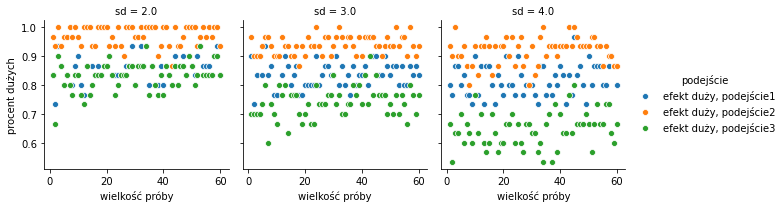

In [21]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_dobrze = ['efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3']

dt = trzy_podejścia[['wielkość próby','sd','efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3']]
dtt = dt[dt['sd'].isin([2,3,4])]
nowe = dtt.melt(value_vars=['efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3'],value_name='procent dużych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='sd',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'wielkość próby','procent dużych')
g.add_legend()
#g.set(xlabel = 'asd')

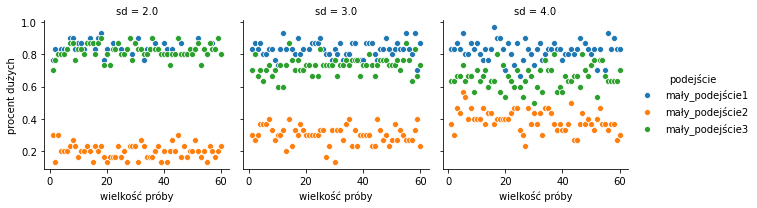

In [22]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_dobrze = ['mały_podejście1','mały_podejście2','mały_podejście3']

dt = trzy_podejścia[['wielkość próby','sd','mały_podejście1','mały_podejście2','mały_podejście3']]
dtt = dt[dt['sd'].isin([2,3,4])]
nowe = dtt.melt(value_vars=['mały_podejście1','mały_podejście2','mały_podejście3'],value_name='procent dużych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='sd',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'wielkość próby','procent dużych')
g.add_legend()
#g.set(xlabel = 'asd')

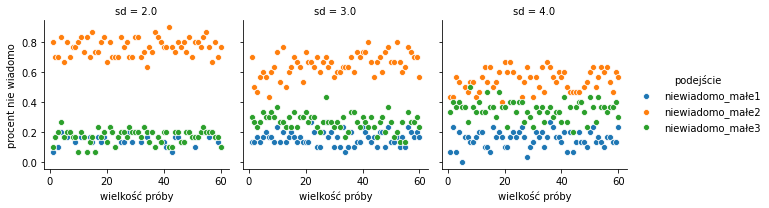

In [14]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_dobrze = ['niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3']

dt = trzy_podejścia[['wielkość próby','sd','niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3']]
dtt = dt[dt['sd'].isin([2,3,4])]
nowe = dtt.melt(value_vars=['niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3'],value_name='procent nie wiadomo',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='sd',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'wielkość próby','procent nie wiadomo')
g.add_legend()
#g.set(xlabel = 'asd')

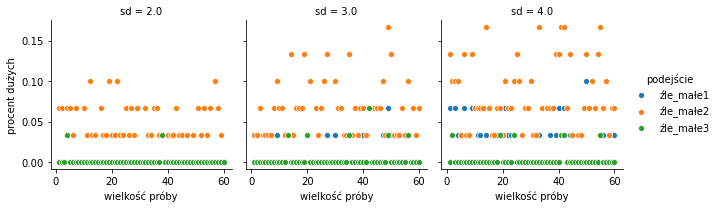

In [23]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_dobrze = ['źle_małe1','źle_małe2','źle_małe3']

dt = trzy_podejścia[['wielkość próby','sd','źle_małe1','źle_małe2','źle_małe3']]
dtt = dt[dt['sd'].isin([2,3,4])]
nowe = dtt.melt(value_vars=['źle_małe1','źle_małe2','źle_małe3'],value_name='procent dużych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='sd',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'wielkość próby','procent dużych')
g.add_legend()
#g.set(xlabel = 'asd')

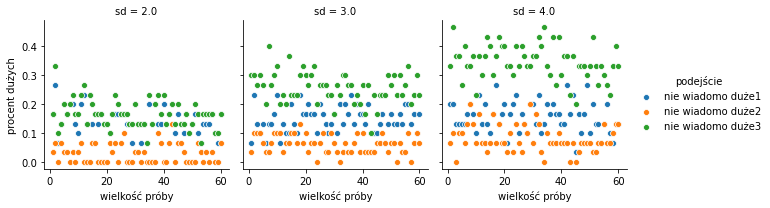

In [24]:

duży_dobrze = ['wielkość próby','sd','nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3']

dt = trzy_podejścia[['wielkość próby','sd','nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3']]
dtt = dt[dt['sd'].isin([2,3,4])]
nowe = dtt.melt(value_vars=['nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3'],value_name='procent dużych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='sd',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'wielkość próby','procent dużych')
g.add_legend()
#g.set(xlabel = 'asd')

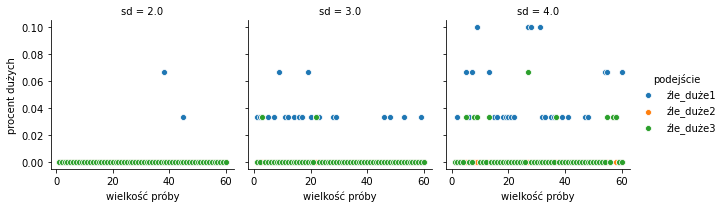

In [25]:

duży_dobrze = ['wielkość próby','sd','źle_duże1','źle_duże2','źle_duże3']

dt = trzy_podejścia[['wielkość próby','sd','źle_duże1','źle_duże2','źle_duże3']]
dtt = dt[dt['sd'].isin([2,3,4])]
nowe = dtt.melt(value_vars=['źle_duże1','źle_duże2','źle_duże3'],value_name='procent dużych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='sd',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'wielkość próby','procent dużych')
g.add_legend()
#g.set(xlabel = 'asd')

In [27]:
duże1 = []
małe1 = []
duże2 = []
duże3 = []
małe2 = []
małe3 = []
źle_duże1 = []
niewiadomo_duże1 = []
źle_duże2 = []
niewiadomo_duże2 = []
źle_duże3 = []
niewiadomo_duże3 = []
źle_małe1 = []
niewiadomo_małe1 = []
źle_małe2 = []
niewiadomo_małe2 = []
źle_małe3 = []
niewiadomo_małe3 = []
przedziały_n = []
ile_dużych = []
ile_małych = []
means = []
delta = 3
mean = 0
eps = 1
#sds = [i*0.1 for i in range(20,50)] 
sds = []
sd1 = 2
for k in range(1,25): 
    p1,p2 = 15+k*5,20+k*5
    #for sd in sds:
    for sd2 in range(20,50):
        sd2 = sd2*0.1
        sds.append(sd2-sd1)
        przedziały_n.append(p1)
        pod1 = []
        pod2 = []
        pod3 = []
        for n in range(p1,p2):
            for j in range(20,61):
                pop_mean = j*0.1
                alfa = 0.05
                sample1 = get_normal_sample(n,mean+pop_mean,sd1)
                sample2 = get_normal_sample(n,mean,sd2)
                pod1.append([independent_1(sample1,sample2,delta,eps),pop_mean,eps])
                pod2.append([independent_2(sample1,sample2,alfa,delta),pop_mean,alfa])
                pod3.append([independent_3(sample1,sample2,alfa,delta),pop_mean,alfa])
    
        # --------------------------------------------------      wśród wyników które były duże, ile z nich wskazał test - (wyniki wskazane przez test)/(faktycznie duże testy
        #---------------------------------------------------      ile razy test wskazał wynik mały, gdy ten w rzeczywistości był duży
        #---------------------------------------------------      ile razy test wskazał "nie wiadomo", gdy efekt w rzeczywistości był duży
        #podejście 1
        duże_pod1 = [i for i in pod1 if np.abs(i[1]) > np.abs(delta)]

        if len(duże_pod1) != 0:
            pod1_dobrze_duże = len([i for i in duże_pod1 if i[0] == 'd'])/len(duże_pod1)
            pod1_źle_duże = len([i for i in duże_pod1 if i[0] == 'm'])/len(duże_pod1)
            pod1_niewiadomo_duże = len([i for i in duże_pod1 if i[0] == 'nwd'])/len(duże_pod1)
        else:
            pod1_dobrze_duże = 'brak'
            pod1_źle_duże = 'brak'
            pod1_niewiadomo_duże = 'brak'
        #podejście 2
        duże_pod2 = [i for i in pod2 if np.abs(i[1]) > np.abs(delta)]
        if len(duże_pod2) != 0:
            pod2_dobrze_duże = len([i for i in duże_pod2 if i[0] == 'd'])/len(duże_pod2)
            pod2_źle_duże = len([i for i in duże_pod2 if i[0] == 'm'])/len(duże_pod2)
            pod2_niewiadomo_duże = len([i for i in duże_pod2 if i[0] == 'nwd'])/len(duże_pod2)
        else:
            pod2_dobrze_duże = 'brak'
            pod2_źle_duże = 'brak'
            pod2_niewiadomo_duże = 'brak'
        #podejście 3
        duże_pod3 = [i for i in pod3 if np.abs(i[1]) > np.abs(delta)]
        if len(duże_pod3) != 0:
            pod3_dobrze_duże = len([i for i in duże_pod3 if i[0] == 'd'])/len(duże_pod3)
            pod3_źle_duże = len([i for i in duże_pod3 if i[0] == 'm'])/len(duże_pod3)
            pod3_niewiadomo_duże = len([i for i in duże_pod3 if i[0] == 'nwd'])/len(duże_pod3)
        else:
            pod3_dobrze_duże = 'brak'
            pod3_źle_duże = 'brak'
            pod3_niewiadomo_duże = 'brak'

        # --------------------------------------------------      wśród wyników które były małe, ile z nich wskazał test - (wyniki małe wskazane przez test)/(faktycznie małe wyniki)
        #---------------------------------------------------      ile razy test wskazał wynik duży, gdy ten w rzeczywistości był mały
        #---------------------------------------------------      ile razy test wskazał "nie wiadomo", gdy efekt w rzeczywistości był duży
        #podejście 1
        małe_pod1 = [i for i in pod1 if (np.abs(i[1]) < np.abs(delta))]
        if len(małe_pod1) != 0:
            pod1_dobrze_małe = len([i for i in małe_pod1 if i[0] == 'm'])/len(małe_pod1)
            pod1_źle_małe = len([i for i in małe_pod1 if i[0] == 'd'])/len(małe_pod1)
            pod1_niewiadomo_małe = len([i for i in małe_pod1 if i[0] == 'nwd'])/len(małe_pod1)
        else:
            pod1_dobrze_małe = 'brak'
            pod1_źle_małe = 'brak'
            pod1_niewiadomo_małe = 'brak'

        #podejście 2
        małe_pod2 = [i for i in pod2 if np.abs(i[1]) < np.abs(delta)]
        if len(małe_pod2) != 0:
            pod2_dobrze_małe = len([i for i in małe_pod2 if i[0] == 'm'])/len(małe_pod2)
            pod2_źle_małe = len([i for i in małe_pod2 if i[0] == 'd'])/len(małe_pod2)
            pod2_niewiadomo_małe = len([i for i in małe_pod2 if i[0] == 'nwd'])/len(małe_pod2)
        else:
            pod2_dobrze_małe = 'brak'
            pod2_źle_małe = 'brak'
            pod2_niewiadomo_małe = 'brak'

        #podejście 3
        małe_pod3 = [i for i in pod3 if np.abs(i[1]) < np.abs(delta)]
        if len(małe_pod3) != 0:
            pod3_dobrze_małe = len([i for i in małe_pod3 if i[0] == 'm'])/len(małe_pod3)
            pod3_źle_małe = len([i for i in małe_pod3 if i[0] == 'd'])/len(małe_pod3)
            pod3_niewiadomo_małe = len([i for i in małe_pod3 if i[0] == 'nwd'])/len(małe_pod3)
        else:
            pod3_dobrze_małe = 'brak'
            pod3_źle_małe = 'brak'
            pod3_niewiadomo_małe = 'brak'


        duże1.append(pod1_dobrze_duże)
        małe1.append(pod1_dobrze_małe)
        duże2.append(pod2_dobrze_duże)
        duże3.append(pod3_dobrze_duże)
        małe2.append(pod2_dobrze_małe)
        małe3.append(pod3_dobrze_małe)

        źle_duże1.append(pod1_źle_duże)
        źle_duże2.append(pod2_źle_duże)
        źle_duże3.append(pod3_źle_duże)
        niewiadomo_duże1.append(pod1_niewiadomo_duże)
        niewiadomo_duże2.append(pod2_niewiadomo_duże)
        niewiadomo_duże3.append(pod3_niewiadomo_duże)

        źle_małe1.append(pod1_źle_małe)
        źle_małe2.append(pod2_źle_małe)
        źle_małe3.append(pod3_źle_małe)
        niewiadomo_małe1.append(pod1_niewiadomo_małe)
        niewiadomo_małe2.append(pod2_niewiadomo_małe)
        niewiadomo_małe3.append(pod3_niewiadomo_małe)


In [28]:
trzy_podejścia = pd.DataFrame(zip(przedziały_n,sdss,duże1,duże2,duże3,małe1,małe2,małe3,źle_duże1,źle_duże2,źle_duże3,niewiadomo_duże1,niewiadomo_duże2,niewiadomo_duże3,źle_małe1,źle_małe2,źle_małe3,niewiadomo_małe1,
                                  niewiadomo_małe2,niewiadomo_małe3), columns = ['wielkość próby','sd','efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3','mały_podejście1','mały_podejście2','mały_podejście3',
                                                                                 'źle_duże1','źle_duże2','źle_duże3','nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3','źle_małe1','źle_małe2','źle_małe3',
                                                                                 'niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3'])
trzy_podejścia

,wielkość próby,sd,"efekt duży, podejście1","efekt duży, podejście2","efekt duży, podejście3",mały_podejście1,mały_podejście2,mały_podejście3,źle_duże1,źle_duże2,źle_duże3,nie wiadomo duże1,nie wiadomo duże2,nie wiadomo duże3,źle_małe1,źle_małe2,źle_małe3,niewiadomo_małe1,niewiadomo_małe2,niewiadomo_małe3
0,20,2.0,0.653333,0.926667,0.653333,0.30,0.04,0.34,0.000000,0.0,0.000000,0.346667,0.073333,0.346667,0.00,0.14,0.00,0.70,0.82,0.66
1,20,2.1,0.686667,0.913333,0.686667,0.24,0.02,0.26,0.000000,0.0,0.000000,0.313333,0.086667,0.313333,0.00,0.20,0.00,0.76,0.78,0.74
2,20,2.2,0.653333,0.920000,0.640000,0.22,0.02,0.20,0.000000,0.0,0.000000,0.346667,0.080000,0.360000,0.02,0.16,0.02,0.76,0.82,0.78
3,20,2.3,0.720000,0.940000,0.700000,0.30,0.04,0.26,0.000000,0.0,0.000000,0.280000,0.060000,0.300000,0.06,0.22,0.04,0.64,0.74,0.70
4,20,2.4,0.640000,0.900000,0.620000,0.24,0.06,0.16,0.000000,0.0,0.000000,0.360000,0.100000,0.380000,0.00,0.22,0.00,0.76,0.72,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,135,4.5,0.680000,0.953333,0.753333,0.14,0.00,0.28,0.000000,0.0,0.000000,0.320000,0.046667,0.246667,0.00,0.12,0.00,0.86,0.88,0.72
716,135,4.6,0.713333,0.966667,0.806667,0.30,0.00,0.40,0.000000,0.0,0.000000,0.286667,0.033333,0.193333,0.00,0.20,0.00,0.70,0.80,0.60
717,135,4.7,0.680000,0.966667,0.760000,0.20,0.00,0.46,0.000000,0.0,0.000000,0.320000,0.033333,0.240000,0.00,0.16,0.02,0.80,0.84,0.52
718,135,4.8,0.673333,0.960000,0.773333,0.24,0.00,0.40,0.000000,0.0,0.013333,0.326667,0.040000,0.213333,0.02,0.14,0.02,0.74,0.86,0.58


In [30]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży = ['efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3']

dt = trzy_podejścia[['wielkość próby','sd','efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['efekt duży, podejście1','efekt duży, podejście2','efekt duży, podejście3'],value_name='procent nie wiadomo',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent nie wiadomo')
g.add_legend()
#g.set(xlabel = 'asd')

In [31]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_niewiadomo = ['nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3']
duży_źle = ['źle_duże1','źle_duże2','źle_duże3']
mały_dobrze = ['mały_podejście1','mały_podejście2','mały_podejście3']

dt = trzy_podejścia[['wielkość próby','sd','nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['nie wiadomo duże1','nie wiadomo duże2','nie wiadomo duże3'],value_name='procent nie wiadomo',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent nie wiadomo')
g.add_legend()
#g.set(xlabel = 'asd')

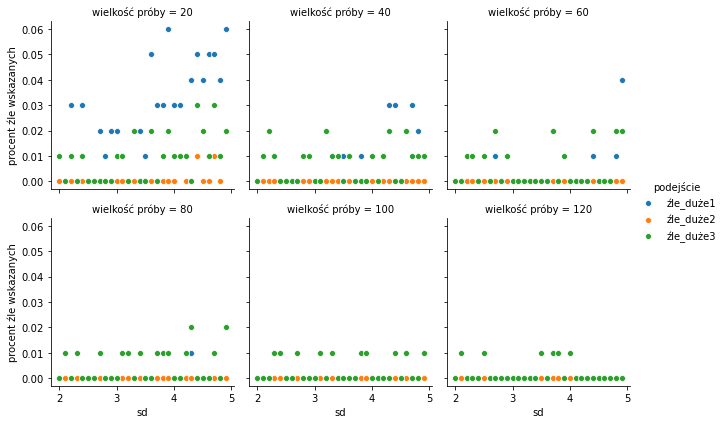

In [30]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
duży_źle = ['źle_duże1','źle_duże2','źle_duże3']
mały_dobrze = ['mały_podejście1','mały_podejście2','mały_podejście3']

dt = trzy_podejścia[['wielkość próby','sd','źle_duże1','źle_duże2','źle_duże3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['źle_duże1','źle_duże2','źle_duże3'],value_name='procent źle wskazanych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent źle wskazanych')
g.add_legend()
#g.set(xlabel = 'asd')

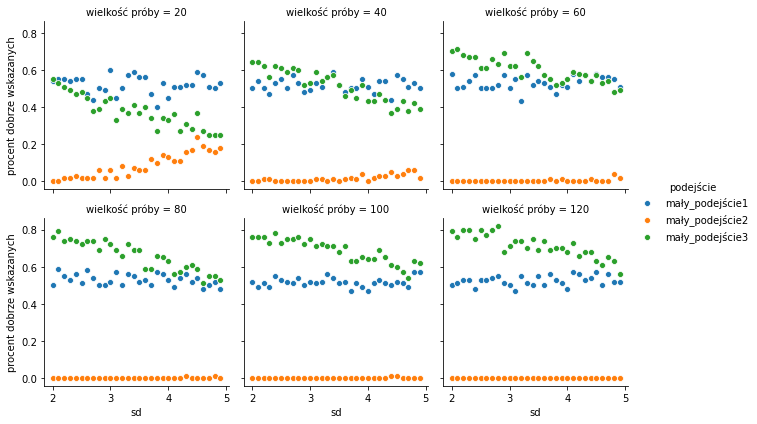

In [31]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
mały_dobrze = ['mały_podejście1','mały_podejście2','mały_podejście3']

dt = trzy_podejścia[['wielkość próby','sd','mały_podejście1','mały_podejście2','mały_podejście3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['mały_podejście1','mały_podejście2','mały_podejście3'],value_name='procent dobrze wskazanych',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent dobrze wskazanych')
g.add_legend()
#g.set(xlabel = 'asd')

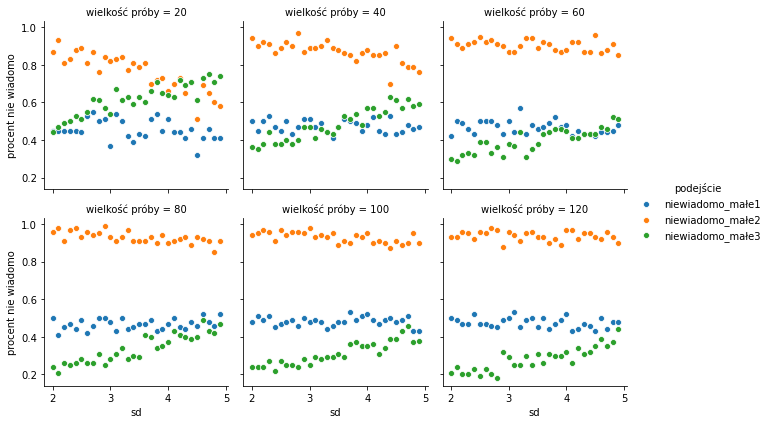

In [32]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
mały_niewiadomo = ['niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3']

dt = trzy_podejścia[['wielkość próby','sd','niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['niewiadomo_małe1','niewiadomo_małe2','niewiadomo_małe3'],value_name='procent nie wiadomo',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent nie wiadomo')
g.add_legend()
#g.set(xlabel = 'asd')

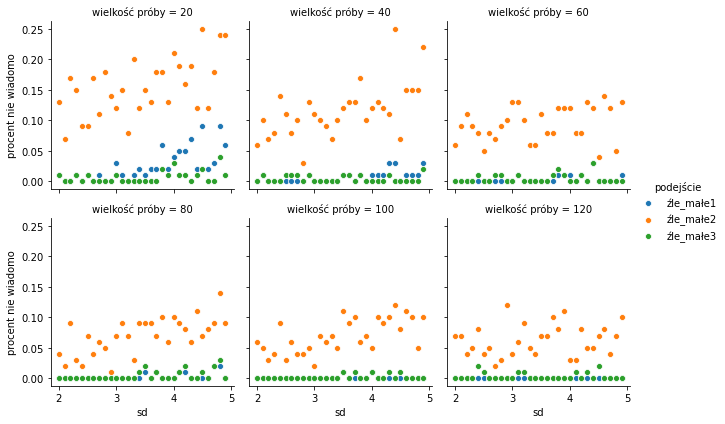

In [35]:
# ogólnie sd w zależności od wielkości próby
#trzy_podejścia[trzy_podejścia['wielkość próby'] == 65]
źle_małe = ['źle_małe1','źle_małe2','źle_małe3']

dt = trzy_podejścia[['wielkość próby','sd','źle_małe1','źle_małe2','źle_małe3']]
dtt = dt[dt['wielkość próby'].isin([20,40,60,80,100,120])]
nowe = dtt.melt(value_vars=['źle_małe1','źle_małe2','źle_małe3'],value_name='procent nie wiadomo',id_vars = ['wielkość próby','sd'],var_name='podejście')
g = sns.FacetGrid(nowe,col='wielkość próby',hue='podejście',col_wrap=3)
#nowe
g.map(sns.scatterplot,'sd','procent nie wiadomo')
g.add_legend()
